In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
print(tf.__version__)

2.0.0


In [50]:
(train_images,train_labels),(test_images,test_labels)=keras.datasets.fashion_mnist.load_data()

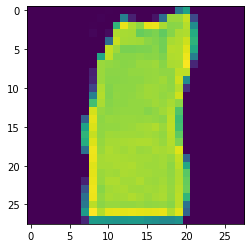

In [51]:
plt.imshow(train_images[1325])

In [52]:
train_images.shape

(60000, 28, 28)

In [53]:
test_images.shape

(10000, 28, 28)

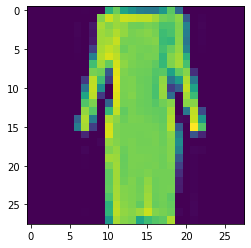

In [54]:
plt.imshow(train_images[13524])

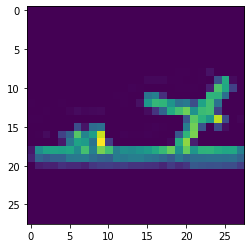

In [55]:
plt.imshow(test_images[1325])

In [56]:
print(test_labels[1325])

5


In [57]:
type(train_images)

numpy.ndarray

In [58]:
type(train_labels)

numpy.ndarray

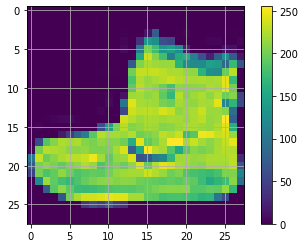

In [59]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

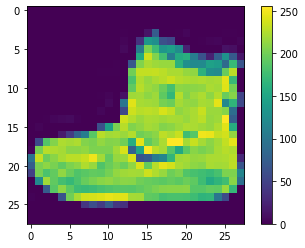

In [60]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [61]:
print(len(train_images[32]))

28


In [62]:
print(train_images[32][0])

[  0   0   0   0   0   1   2   0   0   0   0  58  88 102  78 100 128  94
   0   0   0   0   0   2   0   0   0   0]


In [63]:
train_images=train_images/255
test_images=test_images/255

In [64]:
train_images.shape[0]

60000

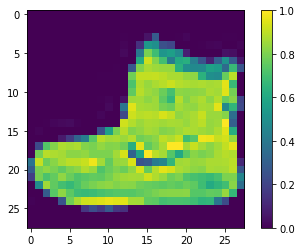

In [78]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [73]:
train_images=train_images.reshape(train_images.shape[0],28,28)
test_images=test_images.reshape(test_images.shape[0],28,28)

In [74]:
print("Training Images Shape : ",train_images.shape)
print('Test Images Shape:', test_images.shape)
print('Number of images in train_images', train_images.shape[0])
print('Number of images in test_images', test_images.shape[0])

Training Images Shape :  (60000, 28, 28)
Test Images Shape: (10000, 28, 28)
Number of images in train_images 60000
Number of images in test_images 10000


In [75]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [76]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4945 - accuracy: 0.8263
Epoch 2/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3723 - accuracy: 0.8646
Epoch 3/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3362 - accuracy: 0.8775
Epoch 4/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3120 - accuracy: 0.8861
Epoch 5/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2927 - accuracy: 0.8920
Epoch 6/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2779 - accuracy: 0.8965
Epoch 7/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2679 - accuracy: 0.9005
Epoch 8/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2569 - accuracy: 0.9042
Epoch 9/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2508 - accuracy: 0.9066
Epoch 10/10
60

In [77]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2377 - accuracy: 0.8786

Test accuracy: 0.8786


### Using 2D Layers , Keras API Requires 4 -dimensions of input shape 

In [27]:
(train_images,train_labels),(test_images,test_labels)=keras.datasets.fashion_mnist.load_data()

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
# Reshaping the array to 4-dims so that it can work with the Keras API
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
train_images /= 255
test_images/= 255
print('x_train shape:', train_images.shape)
print('Number of images in x_train', train_images.shape[0])
print('Number of images in x_test', test_images.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


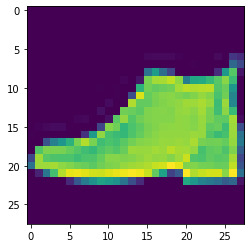

In [30]:
plt.imshow(train_images[4485].reshape(28,28))

In [31]:
input_shape1 = (28, 28,1)
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model1 = Sequential()
model1.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape1))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model1.add(Dense(128, activation=tf.nn.relu))
model1.add(Dropout(0.2))
# model1.add(Dense(10,activation=tf.nn.relu))
model1.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


In [32]:
model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model1.fit(x=train_images,y=train_labels, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 32s 526us/step - loss: 0.4251 - accuracy: 0.8475
Epoch 2/2
60000/60000 [==============================] - 31s 518us/step - loss: 0.2912 - accuracy: 0.8945


In [33]:
test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8913999795913696


In [34]:
model1.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 99us/step


[0.2925733606338501, 0.8913999795913696]

In [35]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [36]:
predictions = model1.predict(test_images)

In [37]:
predictions[0]

array([2.02787032e-06, 4.87755460e-06, 8.02014085e-07, 5.96826510e-07,
       4.22855095e-07, 1.12640875e-04, 3.25941016e-07, 1.86577644e-02,
       7.69615726e-05, 9.81143594e-01], dtype=float32)

In [38]:
np.argmax(predictions[0])

9

In [39]:
test_labels[0]

9

In [40]:
len(predictions)

10000

In [41]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)  
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

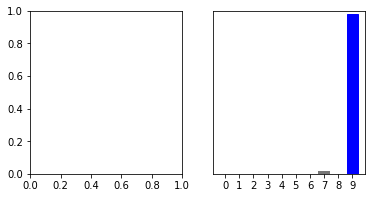

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
# plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

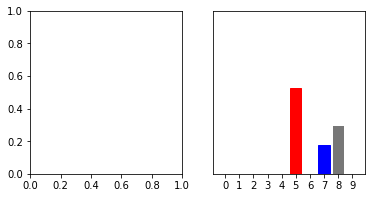

In [43]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
# plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [44]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28, 1)


In [45]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [46]:
predictions_single = model1.predict(img)

print(predictions_single)

[[1.4142397e-04 6.8947570e-10 9.9953020e-01 1.8304954e-06 1.4853862e-04
  1.5551107e-11 1.7800851e-04 1.2962168e-12 1.9315969e-08 2.9680577e-10]]


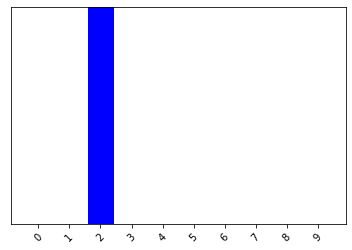

In [47]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10),  rotation=45)

In [48]:
np.argmax(predictions_single[0])

2

### Saving the model in H5 format

In [49]:
model1.save('my_model.h5')